In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Transform to normalize the images to [0,1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)  # 10 output classes for MNIST digits

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with accuracy calculation
# Training loop with accuracy calculation
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = (correct / total) * 100  # accuracy percentage

    # Print the loss and accuracy for this epoch
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')


Epoch 1, Loss: 0.3174, Accuracy: 90.42%
Epoch 2, Loss: 0.1459, Accuracy: 95.65%
Epoch 3, Loss: 0.1075, Accuracy: 96.72%


In [22]:
import torch.quantization as tq

# Switch the model to evaluation mode
model.eval()

# Apply dynamic quantization
model_quantized = tq.quantize_dynamic(
    model,  # The model to quantize
    {torch.nn.Linear},  # The types of layers to quantize
    dtype=torch.qint8  # Use 8-bit quantization
)

# Save the quantized model
torch.save(model_quantized, "quantized_model.pt")
print("Quantized model saved as quantized_model.pt")


Quantized model saved as quantized_model.pt


Enter the index of the test image (0-9999): 23


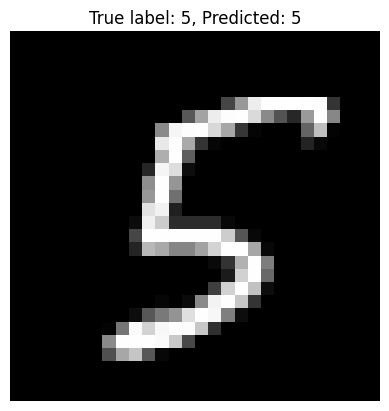

In [25]:
# Get the index from the user
index = int(input("Enter the index of the test image (0-9999): "))

# Select the test image and its true label
image, true_label = test_loader.dataset[index]

# Perform the prediction using the quantized model
predicted_label = get_prediction(quantized_model, image.unsqueeze(0))  # Add batch dimension

# Convert the image to a NumPy array for display (remove extra dimensions)
image = image.squeeze().numpy()

# Display the image and results
plt.imshow(image, cmap='gray')
plt.title(f"True label: {true_label}, Predicted: {predicted_label.item()}")
plt.axis('off')
plt.show()


Enter the index of the test image (0-9999): 112


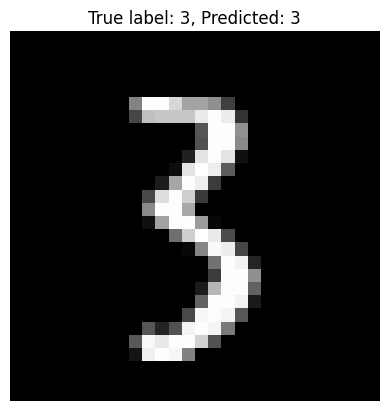

In [26]:
# Get the index from the user
index = int(input("Enter the index of the test image (0-9999): "))

# Select the test image and its true label
image, true_label = test_loader.dataset[index]

# Perform the prediction using the quantized model
predicted_label = get_prediction(quantized_model, image.unsqueeze(0))  # Add batch dimension

# Convert the image to a NumPy array for display (remove extra dimensions)
image = image.squeeze().numpy()

# Display the image and results
plt.imshow(image, cmap='gray')
plt.title(f"True label: {true_label}, Predicted: {predicted_label.item()}")
plt.axis('off')
plt.show()


Enter the index of the test image (0-9999): 234


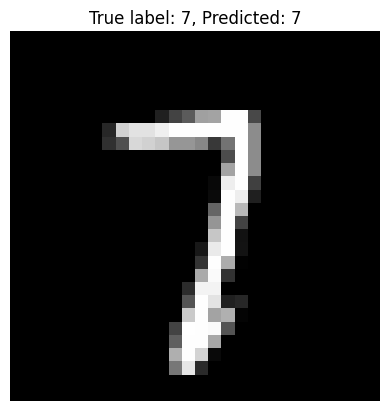

In [27]:
# Get the index from the user
index = int(input("Enter the index of the test image (0-9999): "))

# Select the test image and its true label
image, true_label = test_loader.dataset[index]

# Perform the prediction using the quantized model
predicted_label = get_prediction(quantized_model, image.unsqueeze(0))  # Add batch dimension

# Convert the image to a NumPy array for display (remove extra dimensions)
image = image.squeeze().numpy()

# Display the image and results
plt.imshow(image, cmap='gray')
plt.title(f"True label: {true_label}, Predicted: {predicted_label.item()}")
plt.axis('off')
plt.show()
